# RICE LEAF DISEASE DETECTION USING CNN

# This dataset contains 120 jpg images of disease infected rice leaves. The images are            grouped into 3 classes based on the type of disease. There are 40 images in each class.

## Classes

### Leaf smut
### Brown spot
### Bacterial leaf blight

## PYTHON IMPLIMENTATION

In [1]:
# Importing Libraries

import numpy as np
import keras
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import random
import cv2
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

## MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [1]:
!pip install split-folders


In [3]:
import splitfolders
splitfolders.ratio(r"C:\Users\PUJARI SRIHARI BABU\Downloads\Data\Data1", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 119 files [00:06, 17.95 files/s]


In [4]:
# Sorting the path of data into variable
train_dir = r'C:\Users\PUJARI SRIHARI BABU\Downloads\output\train'  #Location of training images
validation_dir = r'C:\Users\PUJARI SRIHARI BABU\Downloads\output\val' # Location of test images
test_dir =r'C:\Users\PUJARI SRIHARI BABU\Downloads\output\test' # Location of test images

## GENERATING TRAINING AND VALIDATION BATCHES OF IMAGES

In [5]:
# Generating batches of image data
train_datagen = ImageDataGenerator(
    rescale= (1./255),
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=(1./255))




train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180,180),
    batch_size=15,
    color_mode='rgb',
    class_mode='categorical',shuffle=True)


val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(180,180),
    batch_size=15,
    color_mode='rgb',
    class_mode='categorical',shuffle=True)




Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.


## PLOTTING TRAIN IMAGES WITH THEIR LABELS

In [6]:
# plotting train images with their labels
def plots(ims, figsize=(20,25), rows=4, interp = False, title = None):
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % 2 ==0 else len(ims) // rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        sp.set_title(class_names[title[i].tolist().index(1)],fontsize=16)
        plt.imshow(ims[i])


# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

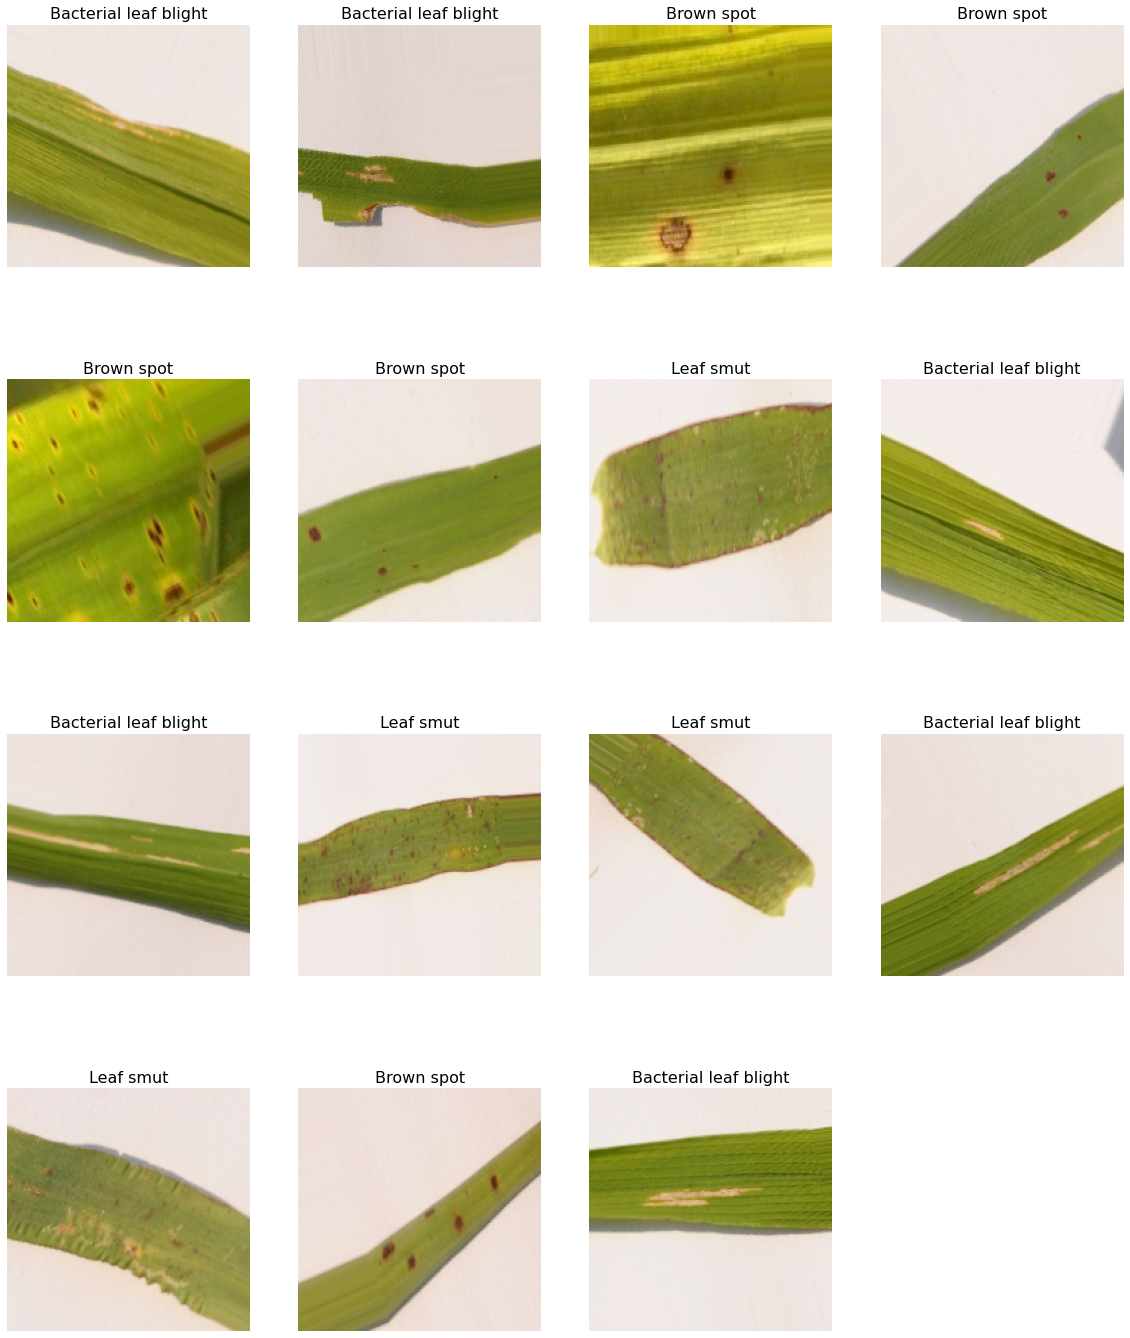

In [7]:
imgs, labels = next(train_generator)
plots(imgs, title = labels)

## CNN MODEL ARCHITECTURE

In [8]:
tf.random.set_seed(32)
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Activation,MaxPooling2D,Dropout,BatchNormalization
from keras.optimizers import SGD
model = Sequential()


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(180,180,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu')) # input node
model.add(Dense(3,activation='softmax')) #output node

## SUMMARY OF MODEL

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 32)       0

## COMPILE MODEL

In [10]:
from tensorflow.keras import optimizers
model.compile(
    loss='CategoricalCrossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

## Train Model

In [11]:
# Fitting the data
    
history = model.fit_generator(train_generator,
    epochs=90, # epochs used to how many itertion (1fp + loss + 1bp)
    validation_data = val_generator,shuffle=True
)

Epoch 1/90
7/7 [==============================] - 15s 985ms/step - loss: 1.1228 - accuracy: 0.3684 - val_loss: 1.0900 - val_accuracy: 0.3636
Epoch 2/90
7/7 [==============================] - 6s 811ms/step - loss: 1.0872 - accuracy: 0.3474 - val_loss: 1.0832 - val_accuracy: 0.4545
Epoch 3/90
7/7 [==============================] - 6s 864ms/step - loss: 1.0393 - accuracy: 0.4000 - val_loss: 1.1348 - val_accuracy: 0.3636
Epoch 4/90
7/7 [==============================] - 6s 898ms/step - loss: 0.9967 - accuracy: 0.4316 - val_loss: 1.1283 - val_accuracy: 0.3636
Epoch 5/90
7/7 [==============================] - 7s 946ms/step - loss: 0.9500 - accuracy: 0.5789 - val_loss: 1.0622 - val_accuracy: 0.4545
Epoch 6/90
7/7 [==============================] - 7s 940ms/step - loss: 0.9441 - accuracy: 0.5263 - val_loss: 1.1079 - val_accuracy: 0.5455
Epoch 7/90
7/7 [==============================] - 6s 823ms/step - loss: 0.9915 - accuracy: 0.4947 - val_loss: 1.0993 - val_accuracy: 0.4545
Epoch 8/90
7/7 [===

7/7 [==============================] - 6s 793ms/step - loss: 0.2544 - accuracy: 0.9158 - val_loss: 0.4347 - val_accuracy: 0.8182
Epoch 60/90
7/7 [==============================] - 6s 817ms/step - loss: 0.2538 - accuracy: 0.8737 - val_loss: 0.6249 - val_accuracy: 0.6364
Epoch 61/90
7/7 [==============================] - 6s 787ms/step - loss: 0.2372 - accuracy: 0.9053 - val_loss: 0.8428 - val_accuracy: 0.7273
Epoch 62/90
7/7 [==============================] - 6s 791ms/step - loss: 0.2312 - accuracy: 0.9368 - val_loss: 0.4169 - val_accuracy: 0.7273
Epoch 63/90
7/7 [==============================] - 6s 786ms/step - loss: 0.2231 - accuracy: 0.8842 - val_loss: 0.4321 - val_accuracy: 0.6364
Epoch 64/90
7/7 [==============================] - 6s 778ms/step - loss: 0.1903 - accuracy: 0.9368 - val_loss: 0.8631 - val_accuracy: 0.6364
Epoch 65/90
7/7 [==============================] - 6s 775ms/step - loss: 0.2886 - accuracy: 0.8737 - val_loss: 0.8214 - val_accuracy: 0.8182
Epoch 66/90
7/7 [========

### AFTER TRAINING

* Validation accuracy - 94.74%
* Training accuracy - 81.82%

## MODEL SAVING

In [12]:
model.save("model.h5")

## PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

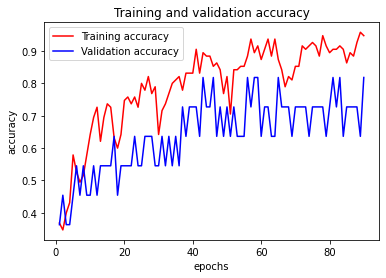

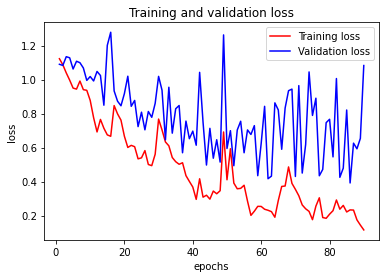

In [13]:
# Step:9 Plotting the training accuracy and validation accuracy
# Plotting the traning loss and validation loss
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "r", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

## CREATED MODEL SUMMARY

In [14]:
model = tf.keras.models.load_model("model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 32)       0

## EVALUATION AND TESTING MODEL

In [16]:
test_datagen = ImageDataGenerator(rescale=(1./255))


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180,180),
    batch_size=15,
    color_mode='rgb',
    class_mode='categorical')

Found 13 images belonging to 3 classes.


In [17]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 608ms/step - loss: 1.6413 - accuracy: 0.7692


[1.6413154602050781, 0.7692307829856873]

## * Here the loss is 1.64 and the accuracy of the model is 76.92

## VISUALISE THE PREDICTION OF MODEL

1/1 [==============================] - 0s 17ms/step


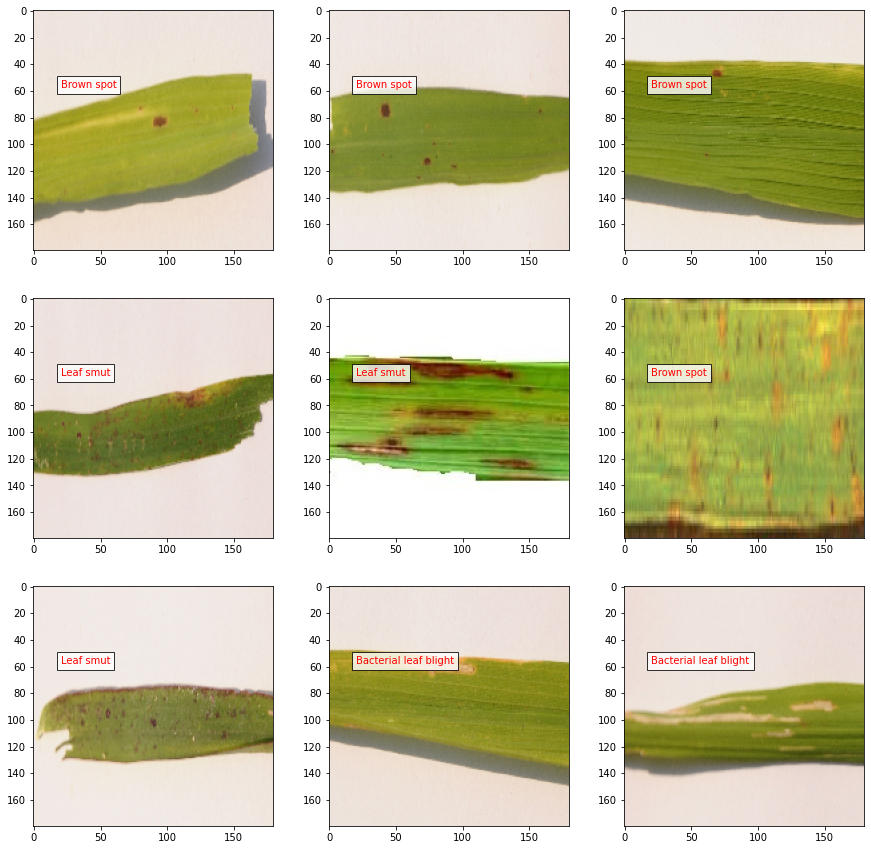

In [18]:

# Visualise the prediction of the model
imgs, labels = next(test_generator)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])